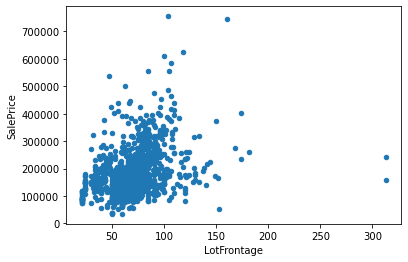

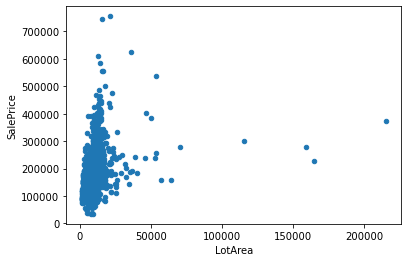

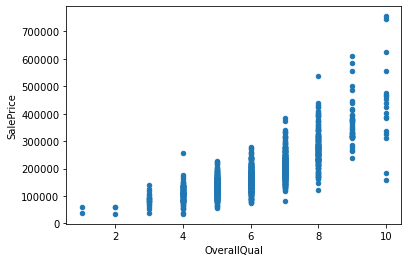

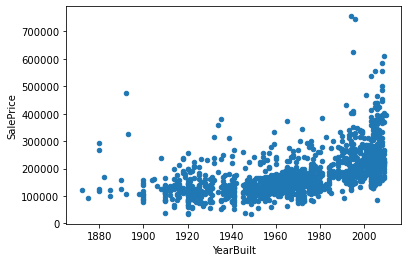

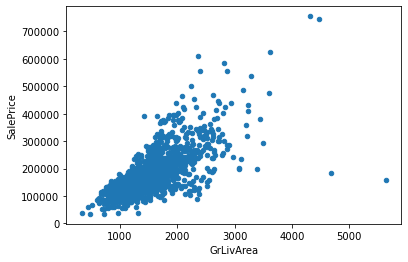

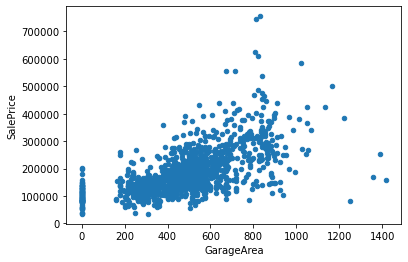

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("train.csv")
dataS = data[["LotFrontage", "LotArea","OverallQual","YearBuilt","GrLivArea","GarageArea", "SalePrice"]]
for i in range(6):
    try:
        dataS.plot.scatter(i,6)
    except:
        pass

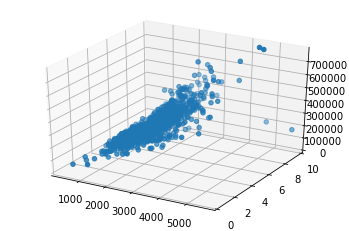

In [19]:
dataSS = dataS[["SalePrice","GrLivArea", "OverallQual"]]
from mpl_toolkits.mplot3d import Axes3D as ax
import numpy as np

fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.scatter(dataSS["GrLivArea"], dataSS["OverallQual"], zs=dataSS["SalePrice"])
X = np.arange(-5, 5, 0.05)
Y = np.arange(-5, 5, 0.05)
X, Y = np.meshgrid(X, Y)
coef1 = np.polyfit(dataSS["GrLivArea"], dataSS["SalePrice"],1)
coef2 = np.polyfit(dataSS["OverallQual"], dataSS["SalePrice"],1)


# Plot the surface.
from matplotlib import cm
ax = fig.gca(projection='3d')
X = np.arange(0, 6000, 5)
Y = np.arange(0, 10, 1)
X, Y = np.meshgrid(X, Y)
Z = coef1[0]*X+coef2[0]*Y
#surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
#                       linewidth=0, antialiased=False)

ax.scatter(dataSS["GrLivArea"], dataSS["OverallQual"], dataSS["SalePrice"])
ax.set_ylim(0, 10.01)
plt.show()

In [59]:
testdata = pd.read_csv("test.csv")
tData = testdata[["GrLivArea", "OverallQual"]]

data = []
for i in range(len(tData)):
    data.append(coef1[0]*tData.iloc[i][0]+coef2[0]*tData.iloc[i][1])
    #print(f"The house has area {tData.iloc[i][0]}m^2 and quality rating {tData.iloc[i][1]}, so price is predicted by this model to be around ${coef1[0]*tData.iloc[i][0]+coef2[0]*tData.iloc[i][1]} ")


df2 = pd.DataFrame(
    {      
        "SalePrice": pd.Series(data, index=list(range(1461, len(tData)+1461)), dtype="float32"),
    }
)

df2.to_csv("submition")